In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array, array_to_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import gc
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("/Users/susovan/Desktop/springboard doc/ship dataset"))



['.DS_Store', 'train', 'test_ApKoW4T.csv', 'sample_submission_ns2btKE.csv']


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# the path for loading .jpg images
path = "/Users/susovan/Desktop/springboard doc/ship dataset/train/images"

train_files = pd.read_csv('/Users/susovan/Desktop/springboard doc/ship dataset/train/train.csv', 
                          dtype={'image': 'object', 'category': 'int8'})

test_files = pd.read_csv('/Users/susovan/Desktop/springboard doc/ship dataset/test_ApKoW4T.csv')

In [3]:
train_files.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [4]:
test_files.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [5]:
# display missing categories in train
train_files[train_files.isnull().any(axis=1)]

,image,category


In [6]:
# dictionary ship encoding 
ship = {'Cargo': 1, 
        'Military': 2, 
        'Carrier': 3, 
        'Cruise': 4, 
        'Tankers': 5}

# reverse the ship type dictionary
ship = dict([[v,k] for k,v in ship.items()])
ship

{1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}

In [7]:
# Create test labels for interpretability
train_files['ship'] = train_files['category'].map(ship).astype('category')
print(train_files)
labels = list(train_files['ship'].unique())
labels

            image  category      ship
0     2823080.jpg         1     Cargo
1     2870024.jpg         1     Cargo
2     2662125.jpg         2  Military
3     2900420.jpg         3   Carrier
4     2804883.jpg         2  Military
...           ...       ...       ...
6247  2881056.jpg         3   Carrier
6248  1145083.jpg         2  Military
6249  2898652.jpg         5   Tankers
6250  2868175.jpg         3   Carrier
6251  2784171.jpg         1     Cargo

[6252 rows x 3 columns]


['Cargo', 'Military', 'Carrier', 'Cruise', 'Tankers']

In [8]:
train_files.dtypes

image         object
category        int8
ship        category
dtype: object

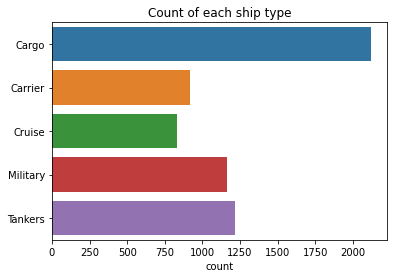

In [9]:
# display count of ship types
plt.title('Count of each ship type')
sns.countplot(y=train_files['ship'].values)
plt.show()


In [10]:
train_files['ship'].value_counts(normalize=False)

Cargo       2120
Tankers     1217
Military    1167
Carrier      916
Cruise       832
Name: ship, dtype: int64

In [11]:
train_files['ship'].value_counts(normalize=True)

Cargo       0.339091
Tankers     0.194658
Military    0.186660
Carrier     0.146513
Cruise      0.133077
Name: ship, dtype: float64

In [12]:
#Encode Train Labels

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype='int8', sparse=False)
y_train = ohe.fit_transform(train_files['category'].values.reshape(-1,1))

In [13]:
# Since most pre-trained models have a specific input dimension,
# we will need to set the target_size to match the pre-trained model input shape.
# Increasing shape of the images requires more RAM.
def load(what='train', target_size=(224,224)):
    array = []
    if what =='train':
        for file in tqdm(train_files['image'].values):
            img = load_img(os.path.join(path, file), target_size=target_size)
            img = img_to_array(img)/255. # normalize image tensor
            array.append(img)
    elif what =='test':
        for file in tqdm(test_files['image'].values):
            img = load_img(os.path.join(path, file), target_size=target_size)
            img = img_to_array(img)/255. # normalize image tensor
            array.append(img)
    gc.collect()
    return np.asarray(array)

In [14]:
# Load Train and Test
X_train = load()
test = load('test')
print(f'train dtype: {X_train.dtype}')
print(f'test dtype: {test.dtype}')
print(f'train shape: {X_train.shape}')

100%|██████████| 2680/2680 [00:10<00:00, 244.67it/s]


train dtype: float32
test dtype: float32
train shape: (6252, 224, 224, 3)


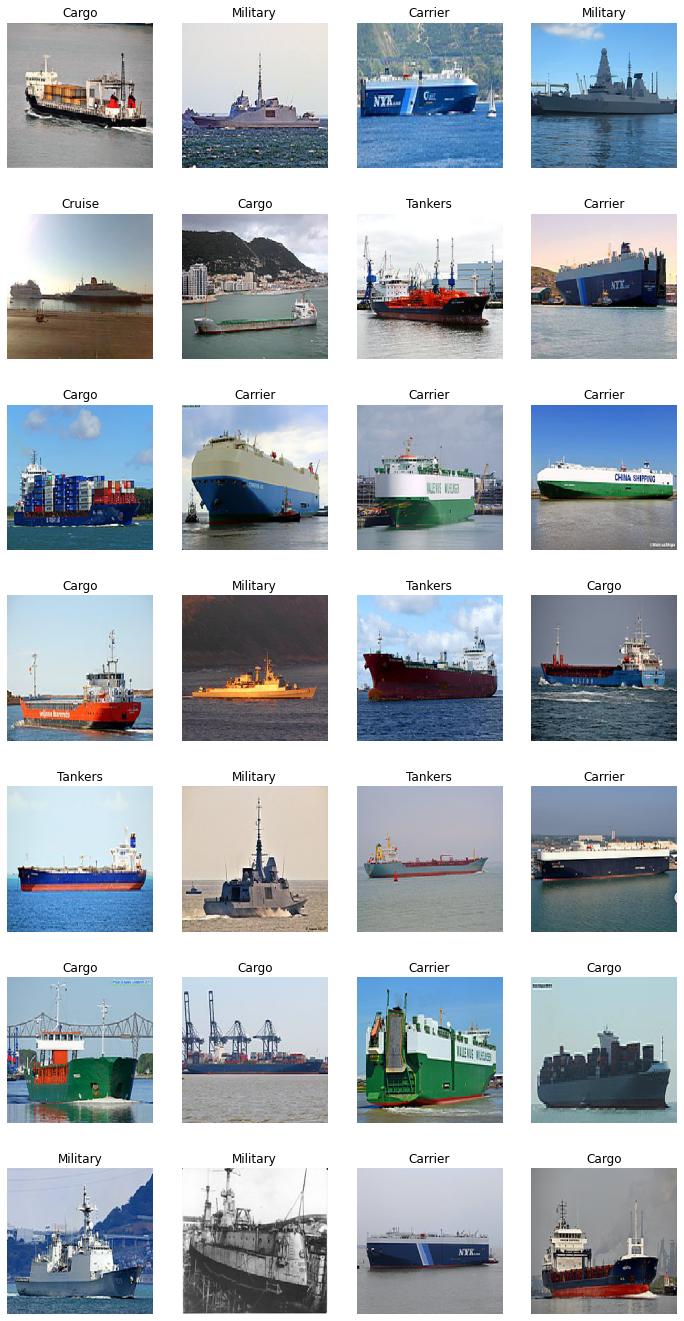

53058

In [15]:
# visualize the top 28 train images
plt.figure(figsize=(12,24))

for i in range(1,29):
    plt.subplot(7,4,i)
    plt.title(f'{train_files["ship"].values[i]}')
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
gc.collect()

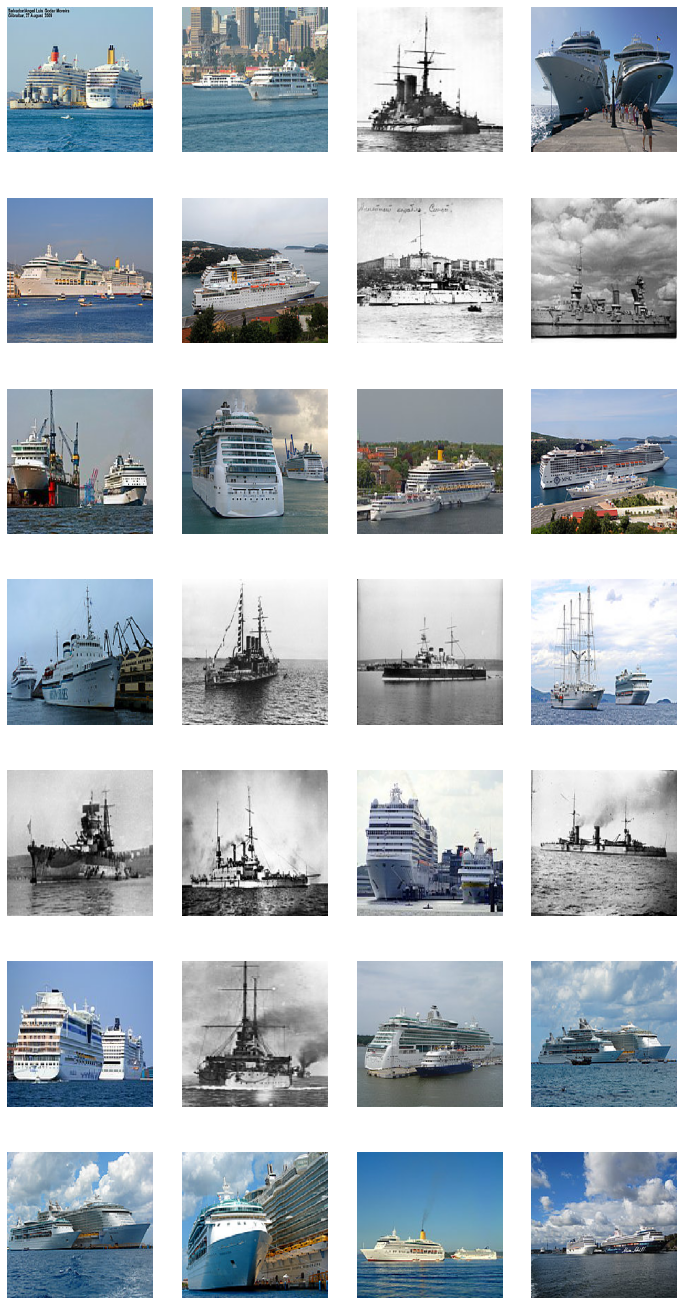

53068

In [16]:
# visualize the top 28 test images
plt.figure(figsize=(12,24))

for i in range(1,29):
    plt.subplot(7,4,i)
    plt.imshow(test[i])
    plt.axis('off')
plt.show()
del test # free up space for training
gc.collect()